# Análisis Exploratorio de Datos (EDA)
## Dataset de Puntos de Interés Turísticos - Predicción de Engagement

En este notebook realizamos un análisis completo del dataset antes del modelado.

In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# SEED para reproducibilidad
SEED = 42
np.random.seed(SEED)

## 1. Carga y Exploración Inicial del Dataset

In [2]:
# Cargar dataset
df = pd.read_csv('poi_dataset.csv')

print("="*70)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*70)
print(f"\nDimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\nMemoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nPrimeras filas:\n{df.head()}")
print(f"\nTipos de datos:\n{df.dtypes}")
print(f"\nValores faltantes:\n{df.isnull().sum()}")

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 1569 filas × 14 columnas

Memoria utilizada: 1.19 MB

Primeras filas:
                                     id  \
0  4b36a3ed-3b28-4bc7-b975-1d48b586db03   
1  e32b3603-a94f-49df-8b31-92445a86377c   
2  0123a69b-13ac-4b65-a5d5-71a95560cff5   
3  390d7d9e-e972-451c-b5e4-f494af15e788   
4  023fc1bf-a1cd-4b9f-af78-48792ab1a294   

                                                name  \
0                                  Galería Fran Reus   
1                            Convento de San Plácido   
2             Instituto Geológico y Minero de España   
3                              Margarita Gil Roësset   
4  Museo del Traje. Centro de Investigación del P...   

                                    shortDescription  \
0  La Galería Fran Reus es un espacio dedicado a ...   
1  El Convento de San Plácido en Madrid, fundado ...   
2  El Instituto Geológico y Minero de España, sit...   
3  Margarita Gil Roësset, escultora y poetisa esp...   
4  El Mu

In [3]:
# Estadísticas descriptivas
print("\n" + "="*70)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print(df.describe().T)


ESTADÍSTICAS DESCRIPTIVAS
              count          mean          std           min           25%  \
tier         1569.0      1.541109     0.637677      1.000000      1.000000   
locationLon  1569.0     -1.132337    22.733401   -121.951049     -3.725292   
locationLat  1569.0     39.900141     9.662134    -62.940930     40.411754   
xps          1569.0    750.382409   228.319854      0.000000    600.000000   
Visits       1569.0  10011.943276     5.456808  10001.000000  10008.000000   
Likes        1569.0   3623.908222  4817.879374    100.000000    464.000000   
Dislikes     1569.0   2526.305927  2225.543360     52.000000    937.000000   
Bookmarks    1569.0    973.261950  1453.333948     50.000000    116.000000   

                      50%           75%           max  
tier             1.000000      2.000000      4.000000  
locationLon     -3.699140     -3.673348    158.333118  
locationLat     40.421738     40.472458     65.706572  
xps            700.000000   1000.000000   1000

## 2. Análisis de la Variable Objetivo - Engagement


ANÁLISIS DE LA VARIABLE OBJETIVO

Threshold de engagement (mediana): 0.1792

Distribución de clases:
  Bajo Engagement (0): 785 (50.0%)
  Alto Engagement (1): 784 (50.0%)


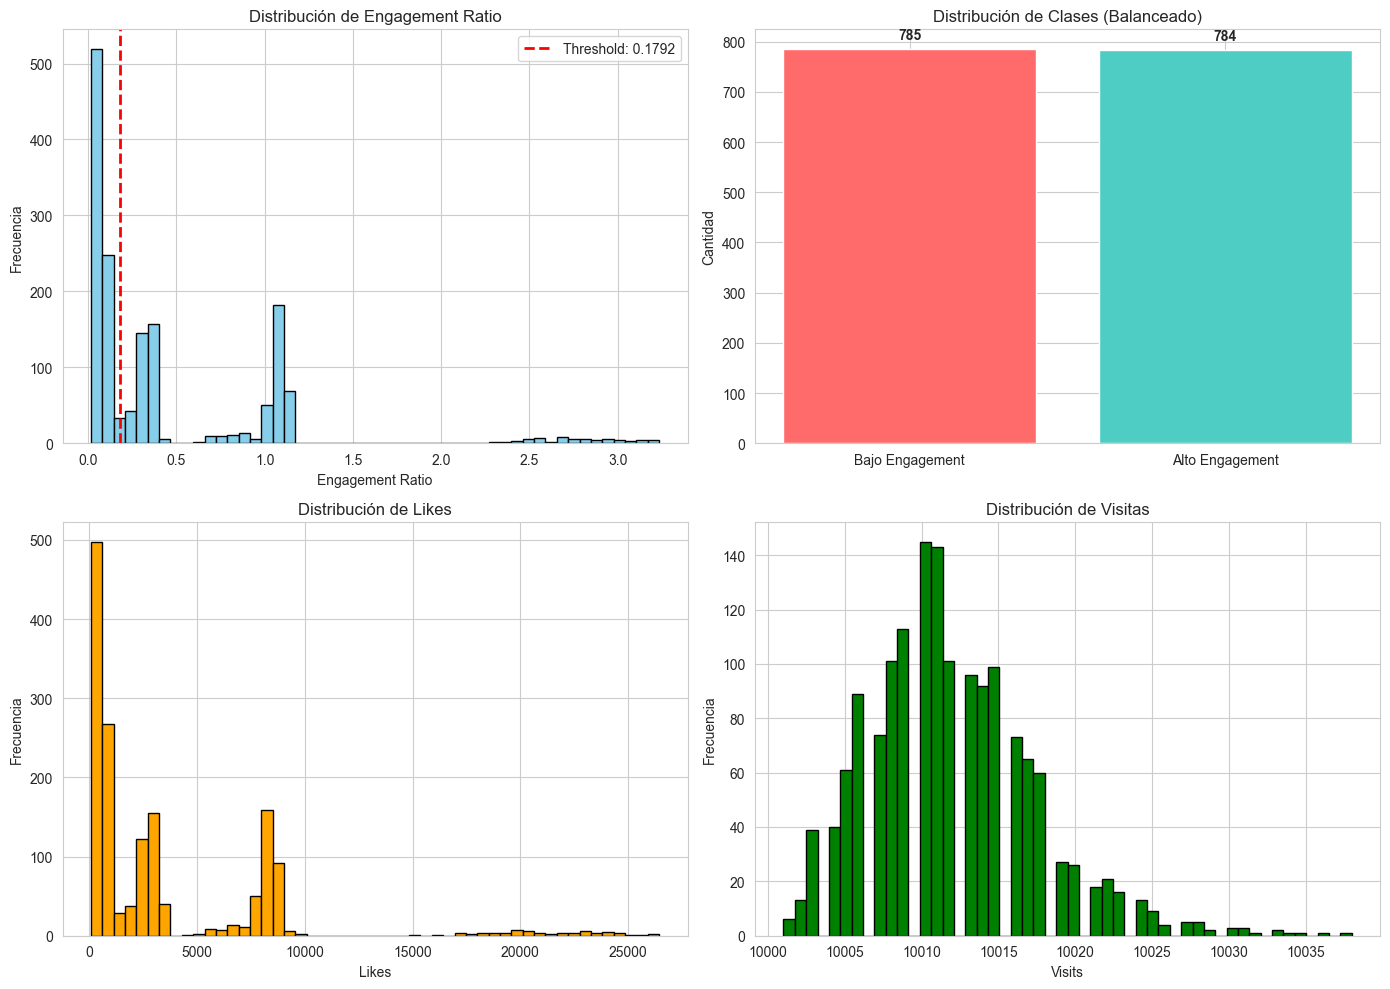

In [4]:
# Crear la variable objetivo
df['engagement_ratio'] = (df['Likes'] + df['Bookmarks']) / (df['Visits'] + 1)
threshold = df['engagement_ratio'].median()
df['target'] = (df['engagement_ratio'] > threshold).astype(int)

print("\n" + "="*70)
print("ANÁLISIS DE LA VARIABLE OBJETIVO")
print("="*70)
print(f"\nThreshold de engagement (mediana): {threshold:.4f}")
print(f"\nDistribución de clases:")
print(f"  Bajo Engagement (0): {(df['target'] == 0).sum()} ({(df['target'] == 0).sum()/len(df)*100:.1f}%)")
print(f"  Alto Engagement (1): {(df['target'] == 1).sum()} ({(df['target'] == 1).sum()/len(df)*100:.1f}%)")

# Visualizar distribución
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribución de engagement_ratio
axes[0, 0].hist(df['engagement_ratio'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.4f}')
axes[0, 0].set_xlabel('Engagement Ratio')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Engagement Ratio')
axes[0, 0].legend()

# Distribución de clases
class_counts = df['target'].value_counts()
axes[0, 1].bar(['Bajo Engagement', 'Alto Engagement'], class_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].set_title('Distribución de Clases (Balanceado)')
for i, v in enumerate(class_counts.values):
    axes[0, 1].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Distribución de Likes
axes[1, 0].hist(df['Likes'], bins=50, color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Likes')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Likes')

# Distribución de Visits
axes[1, 1].hist(df['Visits'], bins=50, color='green', edgecolor='black')
axes[1, 1].set_xlabel('Visits')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Visitas')

plt.tight_layout()
plt.show()

## 3. Análisis de Características Numéricas


ANÁLISIS DE CARACTERÍSTICAS NUMÉRICAS
              count          mean          std           min           25%  \
locationLon  1569.0     -1.132337    22.733401   -121.951049     -3.725292   
locationLat  1569.0     39.900141     9.662134    -62.940930     40.411754   
xps          1569.0    750.382409   228.319854      0.000000    600.000000   
Visits       1569.0  10011.943276     5.456808  10001.000000  10008.000000   
Likes        1569.0   3623.908222  4817.879374    100.000000    464.000000   
Bookmarks    1569.0    973.261950  1453.333948     50.000000    116.000000   
Dislikes     1569.0   2526.305927  2225.543360     52.000000    937.000000   

                      50%           75%           max  
locationLon     -3.699140     -3.673348    158.333118  
locationLat     40.421738     40.472458     65.706572  
xps            700.000000   1000.000000   1000.000000  
Visits       10011.000000  10015.000000  10038.000000  
Likes         1434.000000   6840.000000  26425.000000  


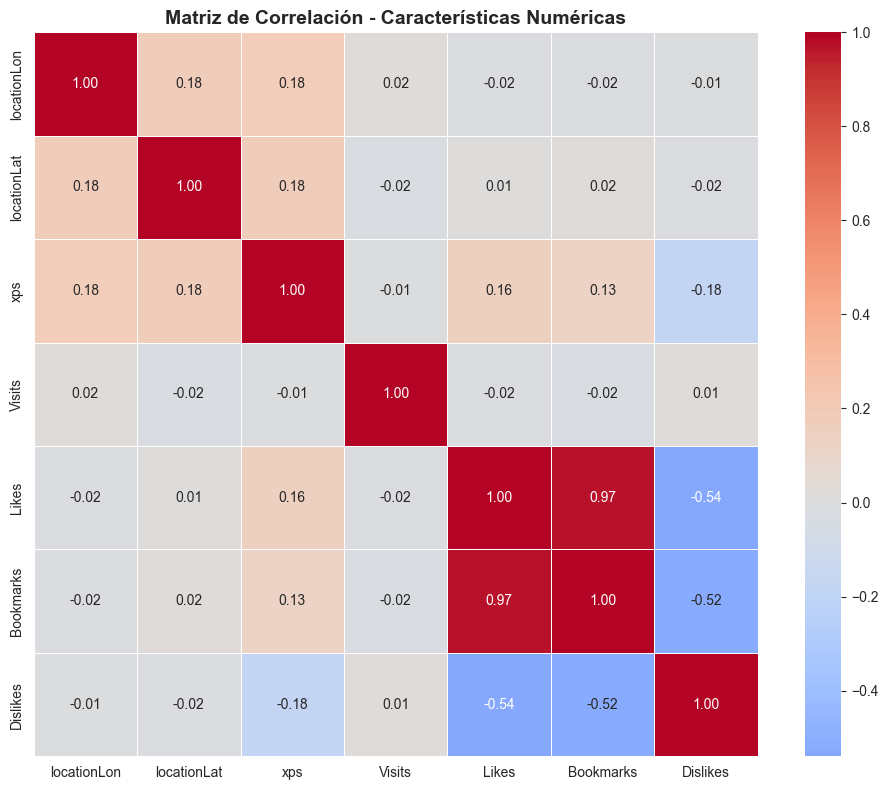


Características más correlacionadas con target:
Likes          0.644656
Bookmarks      0.582011
xps            0.216688
locationLon    0.026476
locationLat    0.002525
Visits        -0.034006
Dislikes      -0.613121
Name: target, dtype: float64


In [5]:
# Características numéricas
num_features = ['locationLon', 'locationLat', 'xps', 'Visits', 'Likes', 'Bookmarks', 'Dislikes']

print("\n" + "="*70)
print("ANÁLISIS DE CARACTERÍSTICAS NUMÉRICAS")
print("="*70)
print(df[num_features].describe().T)

# Matriz de correlación
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=ax, square=True, linewidths=0.5)
ax.set_title('Matriz de Correlación - Características Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nCaracterísticas más correlacionadas con target:")
correlations_with_target = df[num_features + ['target']].corr()['target'].drop('target').sort_values(ascending=False)
print(correlations_with_target)

## 4. Análisis de Características Categóricas


ANÁLISIS DE CARACTERÍSTICAS CATEGÓRICAS

Categorías únicas totales: 12

Top 15 categorías más frecuentes:
  Historia: 1297
  Cultura: 1030
  Arquitectura: 660
  Patrimonio: 603
  Escultura: 482
  Misterio: 382
  Ciencia: 132
  Ocio: 76
  Pintura: 48
  Naturaleza: 43
  Cine: 23
  Gastronomía: 18


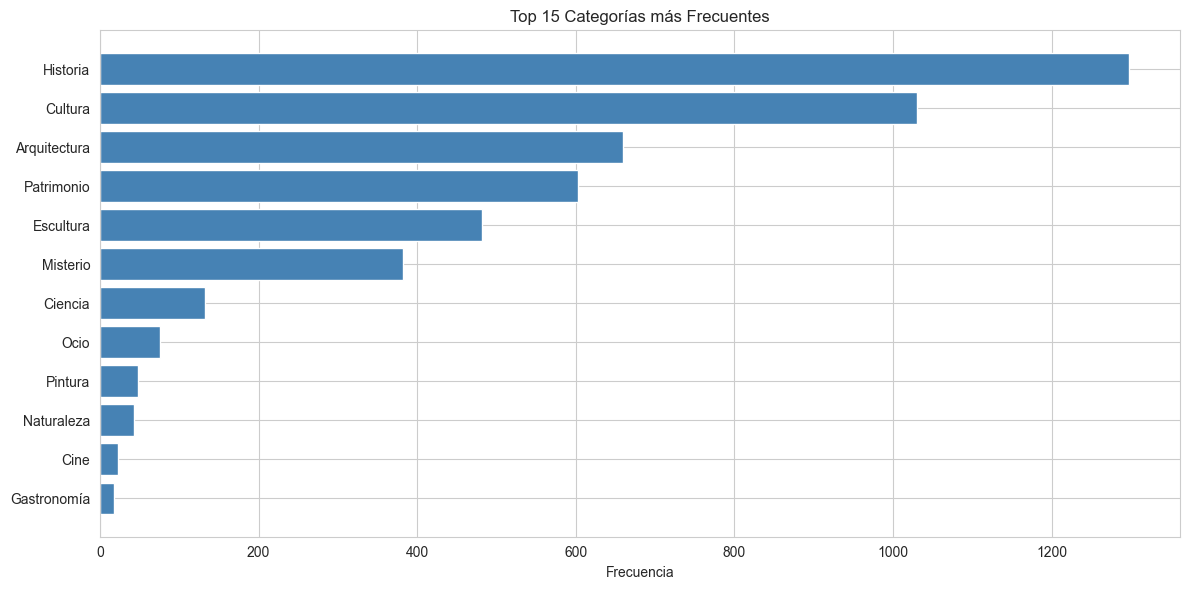

In [6]:
# Analizar categorías
print("\n" + "="*70)
print("ANÁLISIS DE CARACTERÍSTICAS CATEGÓRICAS")
print("="*70)

# Procesar categorías
df['categories'] = df['categories'].apply(ast.literal_eval)

# Contar categorías únicas
all_categories = []
for cats in df['categories']:
    all_categories.extend(cats)

from collections import Counter
category_counts = Counter(all_categories)

print(f"\nCategorías únicas totales: {len(category_counts)}")
print(f"\nTop 15 categorías más frecuentes:")
top_categories = dict(category_counts.most_common(15))
for cat, count in top_categories.items():
    print(f"  {cat}: {count}")

# Visualizar top categorías
fig, ax = plt.subplots(figsize=(12, 6))
cats, counts = zip(*category_counts.most_common(15))
ax.barh(cats, counts, color='steelblue')
ax.set_xlabel('Frecuencia')
ax.set_title('Top 15 Categorías más Frecuentes')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Análisis de Imágenes

In [7]:
# Verificar integridad de imágenes
print("\n" + "="*70)
print("ANÁLISIS DE IMÁGENES")
print("="*70)

print(f"Total de registros en dataset: {len(df)}")

valid_images = 0
missing_images = 0
corrupted_images = 0
image_sizes = []

for idx, row in df.iterrows():
    img_path = row['main_image_path']
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path)
            img.verify()  # Verificar integridad
            img = Image.open(img_path)  # Reabrir después de verify
            image_sizes.append(img.size)
            valid_images += 1
        except Exception as e:
            corrupted_images += 1
    else:
        missing_images += 1
    
    if idx % 200 == 0:
        print(f"Procesadas {idx}/{len(df)} imágenes...")

print(f"\n{'─'*50}")
print(f"✓ Imágenes válidas:           {valid_images:>6} ({valid_images/len(df)*100:.1f}%)")
print(f"✗ Imágenes faltantes:         {missing_images:>6} ({missing_images/len(df)*100:.1f}%)")
print(f"⚠ Imágenes corruptas:         {corrupted_images:>6} ({corrupted_images/len(df)*100:.1f}%)")
print(f"{'─'*50}")
print(f"Tasa de disponibilidad:       {valid_images/len(df)*100:.1f}%")

if image_sizes:
    widths, heights = zip(*image_sizes)
    print(f"\n{'─'*50}")
    print(f"DIMENSIONES DE IMÁGENES")
    print(f"{'─'*50}")
    print(f"  Ancho:  min={min(widths):>5}, max={max(widths):>5}, promedio={np.mean(widths):>6.0f}")
    print(f"  Alto:   min={min(heights):>5}, max={max(heights):>5}, promedio={np.mean(heights):>6.0f}")


ANÁLISIS DE IMÁGENES
Total de registros en dataset: 1569
Procesadas 0/1569 imágenes...
Procesadas 200/1569 imágenes...
Procesadas 400/1569 imágenes...
Procesadas 600/1569 imágenes...
Procesadas 800/1569 imágenes...
Procesadas 1000/1569 imágenes...
Procesadas 1200/1569 imágenes...
Procesadas 1400/1569 imágenes...

──────────────────────────────────────────────────
✓ Imágenes válidas:             1569 (100.0%)
✗ Imágenes faltantes:              0 (0.0%)
⚠ Imágenes corruptas:              0 (0.0%)
──────────────────────────────────────────────────
Tasa de disponibilidad:       100.0%

──────────────────────────────────────────────────
DIMENSIONES DE IMÁGENES
──────────────────────────────────────────────────
  Ancho:  min=  128, max=  128, promedio=   128
  Alto:   min=  128, max=  128, promedio=   128


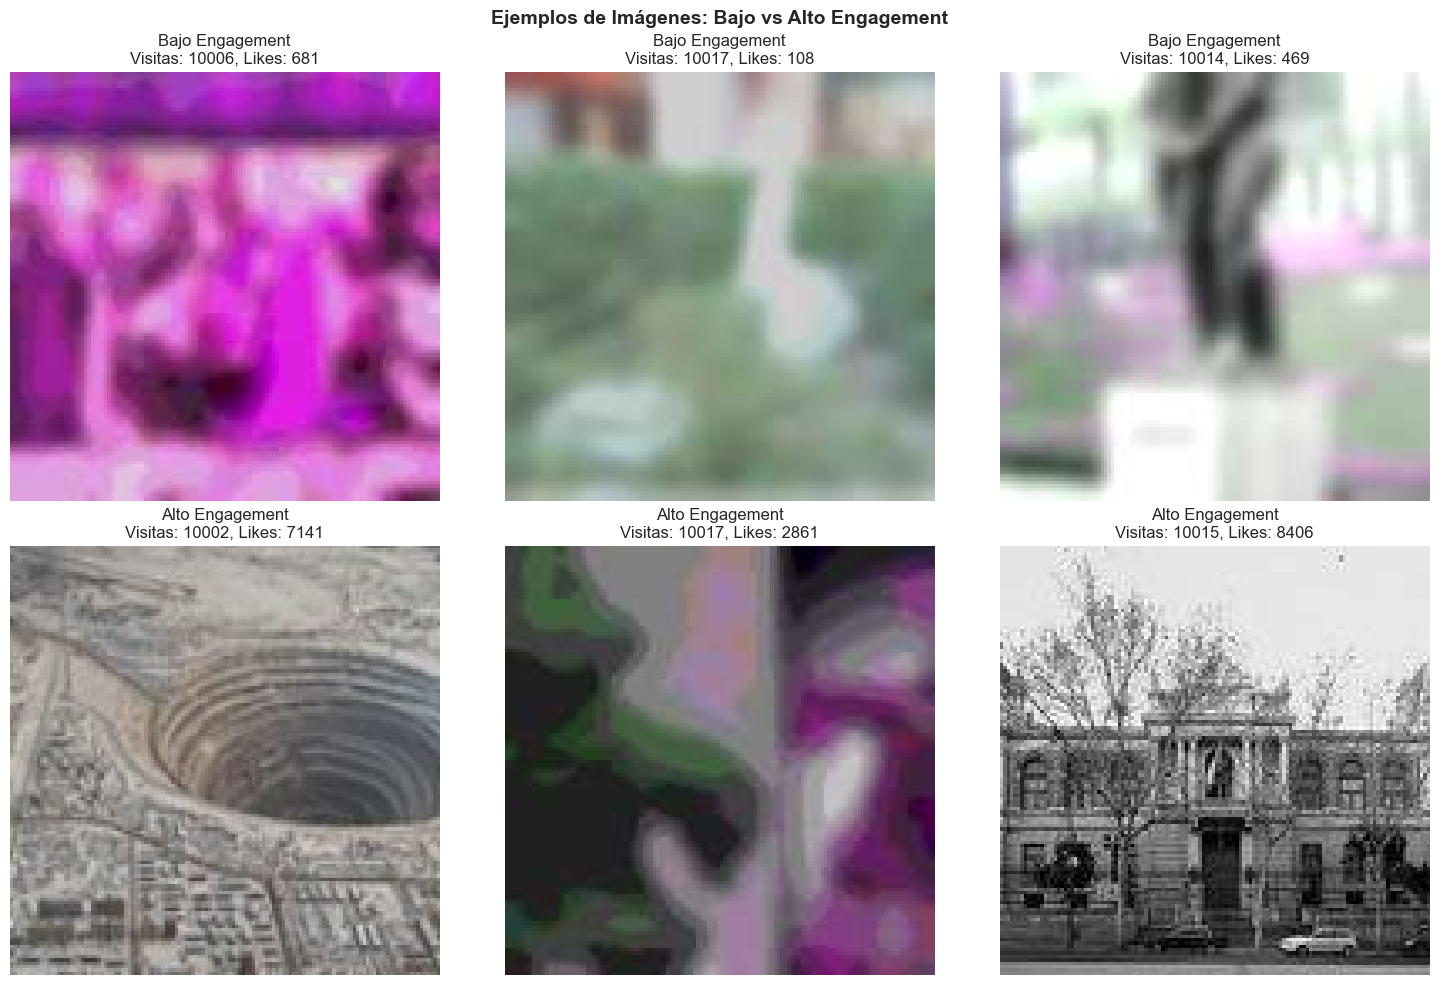

In [8]:
# Mostrar ejemplos de imágenes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Muestra de bajo engagement
low_engagement_samples = df[df['target'] == 0].sample(min(3, len(df[df['target'] == 0])), random_state=SEED)
for idx, (pidx, row) in enumerate(low_engagement_samples.iterrows()):
    img_path = row['main_image_path']
    try:
        img = Image.open(img_path)
        axes[0, idx].imshow(img)
        axes[0, idx].set_title(f"Bajo Engagement\nVisitas: {row['Visits']}, Likes: {row['Likes']}")
        axes[0, idx].axis('off')
    except:
        axes[0, idx].text(0.5, 0.5, 'Error cargando imagen', ha='center')
        axes[0, idx].axis('off')

# Muestra de alto engagement
high_engagement_samples = df[df['target'] == 1].sample(min(3, len(df[df['target'] == 1])), random_state=SEED)
for idx, (pidx, row) in enumerate(high_engagement_samples.iterrows()):
    img_path = row['main_image_path']
    try:
        img = Image.open(img_path)
        axes[1, idx].imshow(img)
        axes[1, idx].set_title(f"Alto Engagement\nVisitas: {row['Visits']}, Likes: {row['Likes']}")
        axes[1, idx].axis('off')
    except:
        axes[1, idx].text(0.5, 0.5, 'Error cargando imagen', ha='center')
        axes[1, idx].axis('off')

plt.suptitle('Ejemplos de Imágenes: Bajo vs Alto Engagement', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Análisis de Características Geográficas


ANÁLISIS GEOGRÁFICO


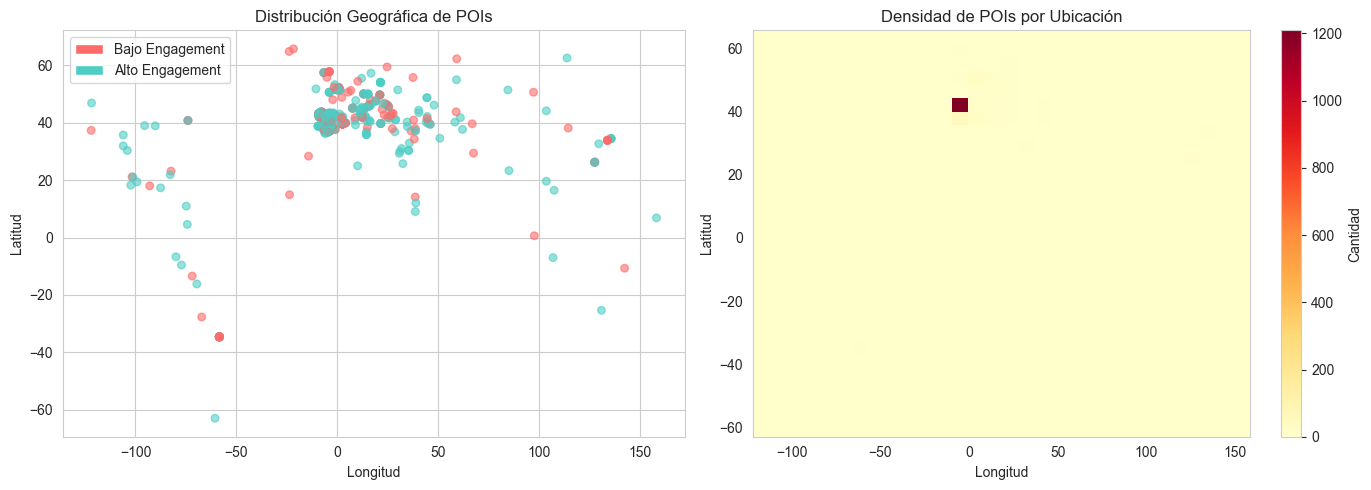

In [9]:
# Análisis geográfico
print("\n" + "="*70)
print("ANÁLISIS GEOGRÁFICO")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot de ubicaciones coloreadas por engagement
colors = df['target'].map({0: '#FF6B6B', 1: '#4ECDC4'})
axes[0].scatter(df['locationLon'], df['locationLat'], c=colors, alpha=0.6, s=30)
axes[0].set_xlabel('Longitud')
axes[0].set_ylabel('Latitud')
axes[0].set_title('Distribución Geográfica de POIs')
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FF6B6B', label='Bajo Engagement'),
                   Patch(facecolor='#4ECDC4', label='Alto Engagement')]
axes[0].legend(handles=legend_elements)

# Density plot
axes[1].hist2d(df['locationLon'], df['locationLat'], bins=30, cmap='YlOrRd')
axes[1].set_xlabel('Longitud')
axes[1].set_ylabel('Latitud')
axes[1].set_title('Densidad de POIs por Ubicación')
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Cantidad')

plt.tight_layout()
plt.show()

## 7. Conclusiones del EDA

In [10]:
print("\n" + "="*70)
print("CONCLUSIONES DEL ANÁLISIS EXPLORATORIO")
print("="*70)

print("""
✓ Dataset Balanceado: Las clases están prácticamente equilibradas (50/50),
  lo que facilita el entrenamiento sin sesgos.

✓ Múltiples Modalidades: Contamos con datos visuales (imágenes) y
  tabulares (ubicación, categorías, métricas de engagement).

✓ Integridad de Datos: Alta disponibilidad de imágenes y pocas
  referencias faltantes.

✓ Variabilidad Espacial: Los POIs están distribuidos geográficamente,
  lo que sugiere que la ubicación puede ser un factor relevante.

✓ Característica Objetivo Clara: El engagement_ratio proporciona una
  métrica cuantitativa clara para definir la clasificación.
  """)


CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

✓ Dataset Balanceado: Las clases están prácticamente equilibradas (50/50),
  lo que facilita el entrenamiento sin sesgos.

✓ Múltiples Modalidades: Contamos con datos visuales (imágenes) y
  tabulares (ubicación, categorías, métricas de engagement).

✓ Integridad de Datos: Alta disponibilidad de imágenes y pocas
  referencias faltantes.

✓ Variabilidad Espacial: Los POIs están distribuidos geográficamente,
  lo que sugiere que la ubicación puede ser un factor relevante.

✓ Característica Objetivo Clara: El engagement_ratio proporciona una
  métrica cuantitativa clara para definir la clasificación.
  
